In [1]:
from IPython.core.display import display, HTML, Javascript

# ----- Notebook Theme -----
color_map = ['#F05454', '#f6ebe8', '#ecd7d0', '#d9c1a2', '#d9afa2', '#b35b45', 
                        '#F05454', '#8d2713', '#7a2b11', '#7a2611', '#53190b']


/tmp/ipykernel_20/1963061457.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML, Javascript


In [2]:
# For the purpose of this tutorial, I am going to make use of Matplotlib and Seaborn only.
import numpy as np 
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import squarify
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv('../input/superstore-dataset-final/Sample - Superstore.csv', encoding='windows-1252') # This line will read the csv file

data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

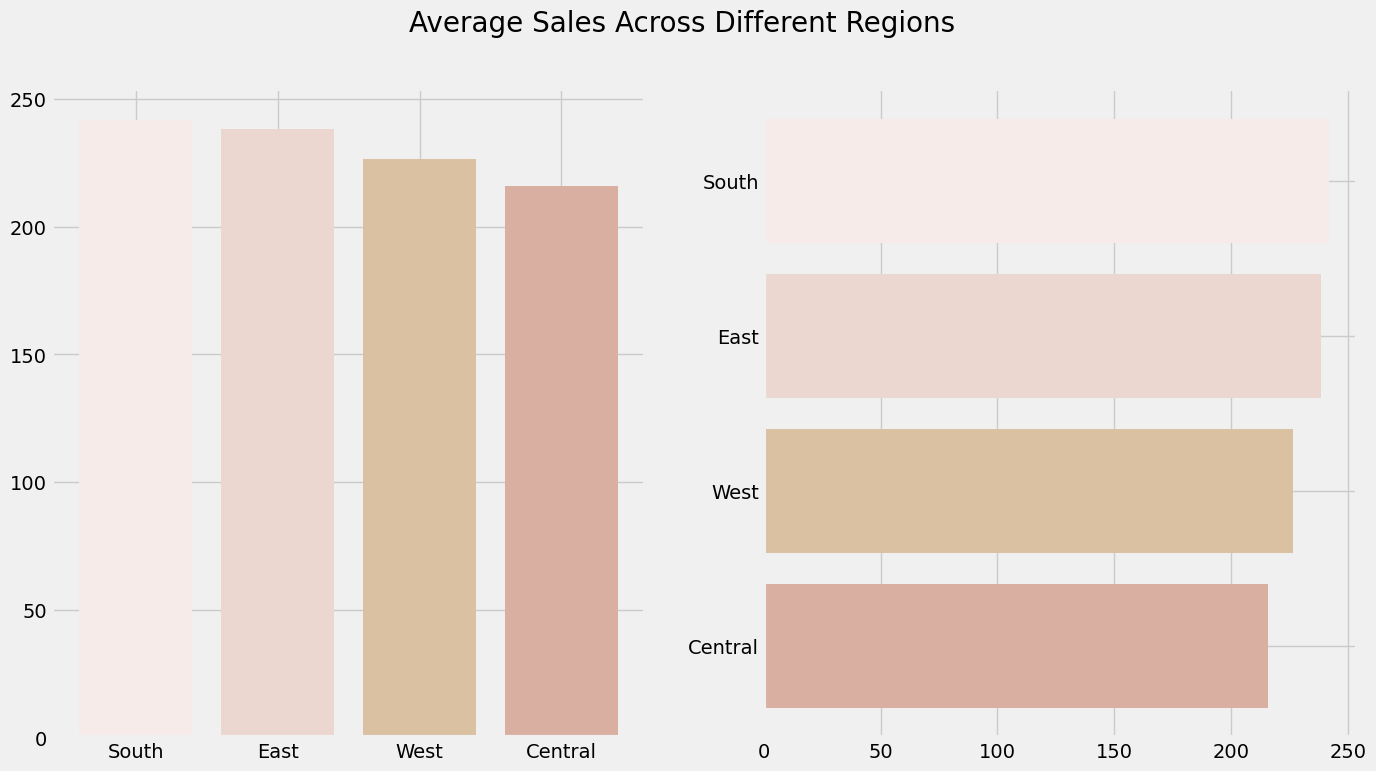

In [5]:
df_bar = data[['Region','Sales']]

# Grouping the DataFrame based on Regions and taking mean of profit across each of them.
# The reason for sorting is to show the larger values at the beginning (Best Practice)
df_bar = df_bar.groupby('Region').mean().sort_values(by='Sales', ascending=False)

plt.figure(figsize=[15,8]) # Setting the figure size

# Visualizing using Bar Chart
plt.suptitle("Average Sales Across Different Regions", size=20)

# Plotting the BarChart
plt.subplot(1,2,1)
plt.bar(x=df_bar.index, height='Sales',color = ['#f6ebe8', '#ecd7d0', '#d9c1a2', '#d9afa2'], data=df_bar)

# Plotting
plt.subplot(1,2,2)
plt.barh(y=df_bar.index, width='Sales',color = ['#f6ebe8', '#ecd7d0', '#d9c1a2', '#d9afa2'], data=df_bar)
plt.gca().invert_yaxis() # Inverting the Y Axis

plt.show()

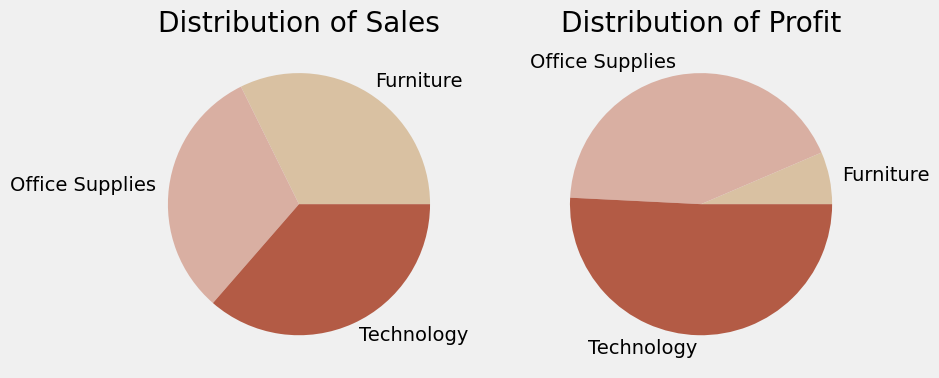

In [6]:
category_sales = data.groupby(['Category'])['Sales'].sum().reset_index()
category_profit = data.groupby(['Category'])['Profit'].sum().reset_index()

# Create a 1x2 grid for two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
pie_color = ['#d9c1a2', '#d9afa2', '#b35b45']

# Plot the first pie chart on the first subplot
axes[0].pie(category_sales['Sales'], labels=category_sales['Category'], colors = pie_color)
axes[0].set_title('Distribution of Sales')

# Plot the second pie chart on the second subplot
axes[1].pie(category_profit['Profit'], labels=category_profit['Category'], colors = pie_color)
axes[1].set_title('Distribution of Profit')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

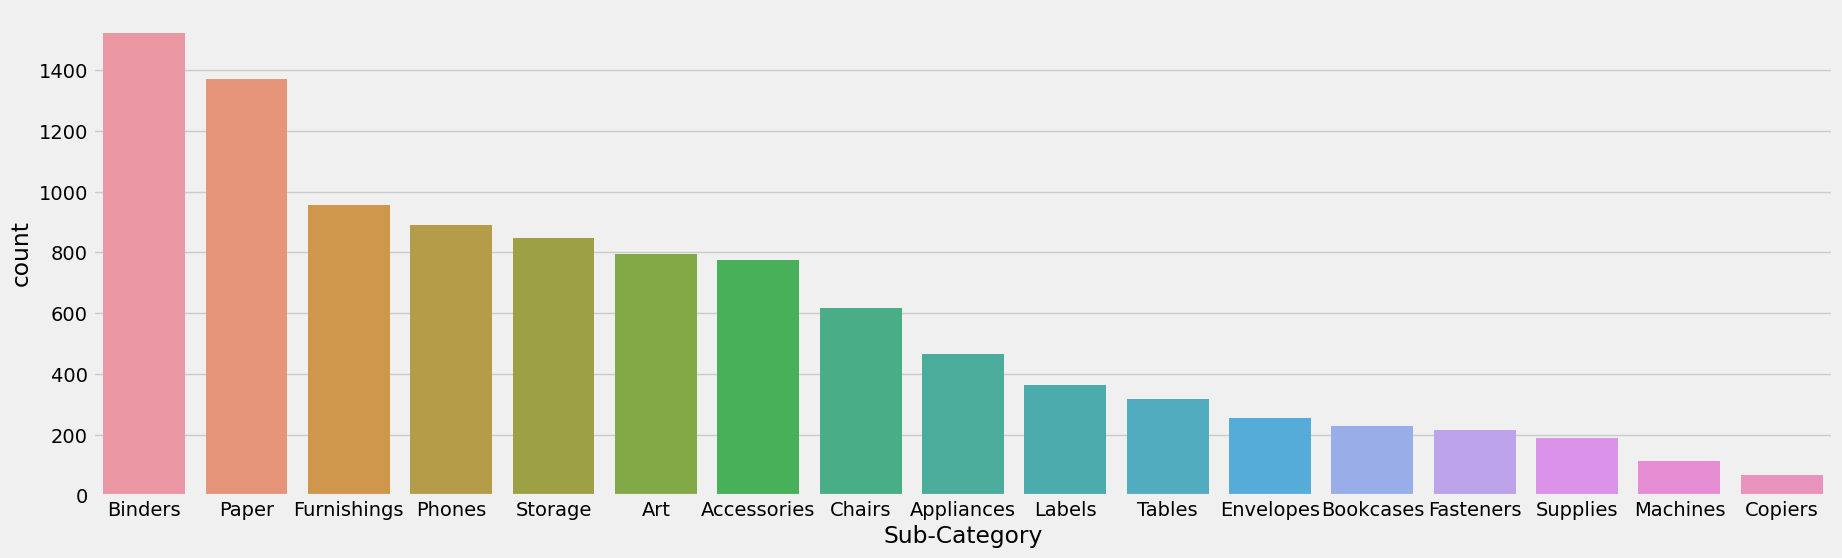

In [7]:
#sort subcategory purchases
sub_category_counts = data['Sub-Category'].value_counts()
sorted_sub_categories = sub_category_counts.index

#Bar chart
plt.figure(figsize=(20,6))
sns.countplot(data=data, x='Sub-Category', order=sorted_sub_categories)
plt.xlabel('Sub-Category')
plt.show()

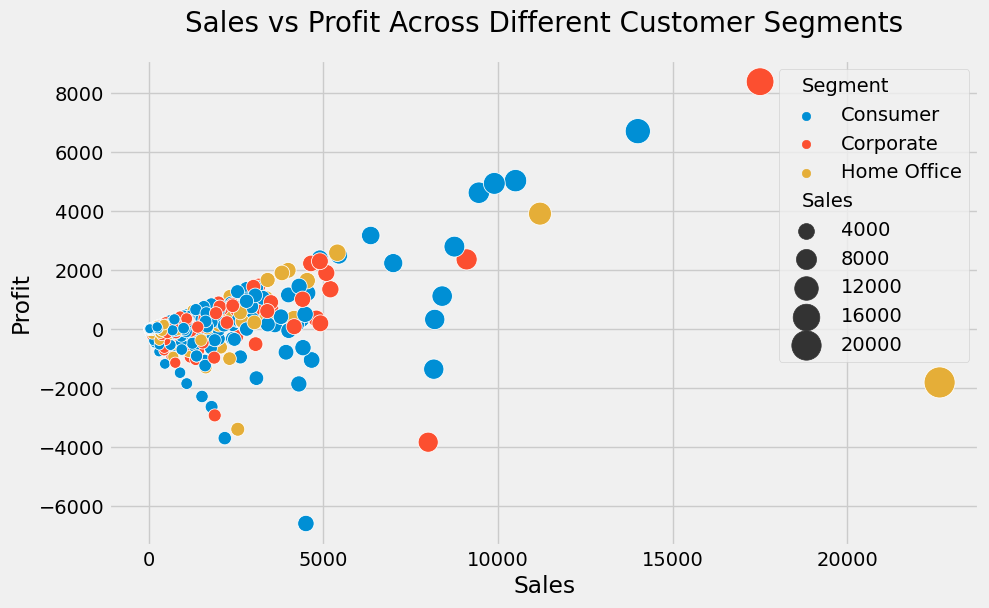

In [8]:
#Scatter PLOT
data_scatter = data[['Sales', 'Profit', 'Segment']]
plt.figure(figsize=[10,6])
sns.scatterplot(x=data_scatter['Sales'], y=data_scatter['Profit'], hue=data_scatter['Segment'],size=data_scatter["Sales"], sizes=(50,500))
plt.title("Sales vs Profit Across Different Customer Segments", size=20, pad=20)
plt.show()

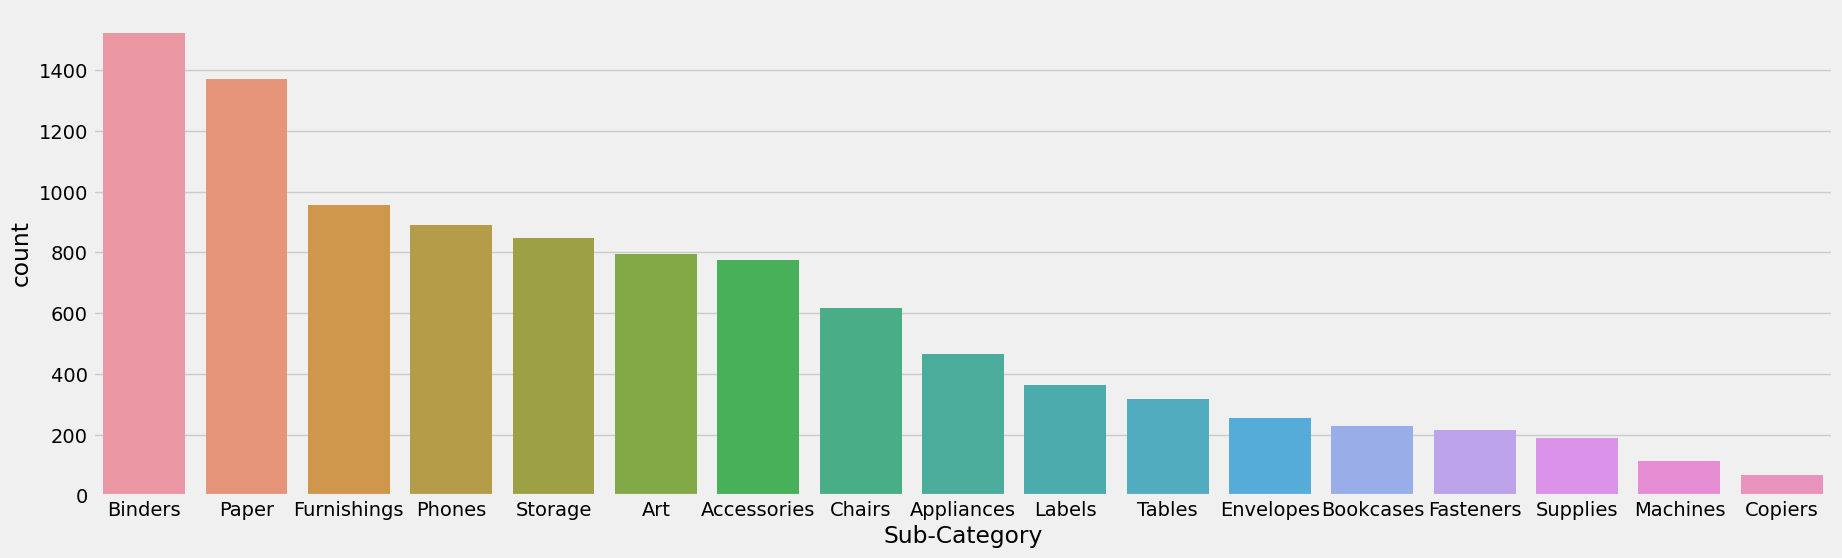

In [9]:
#sort subcategory purchases
sub_category_counts = data['Sub-Category'].value_counts()
sorted_sub_categories = sub_category_counts.index

#Bar chart
plt.figure(figsize=(20,6))
sns.countplot(data=data, x='Sub-Category', order=sorted_sub_categories)
plt.xlabel('Sub-Category')
plt.show()

In [10]:
#creating a column seeing if there is a possitive profit or a loss
import plotly.express as px
profit_Rate = data.groupby(['Category', 'Ship Mode'])['Profit'].mean().reset_index()

# Create the density heatmap
fig = px.density_heatmap(profit_Rate, x='Category', y='Ship Mode', z='Profit', 
                         title='Profit Rate by Category & Ship Mode')
fig.update_layout(xaxis_title='Category', yaxis_title='Ship Mode')
fig.show()

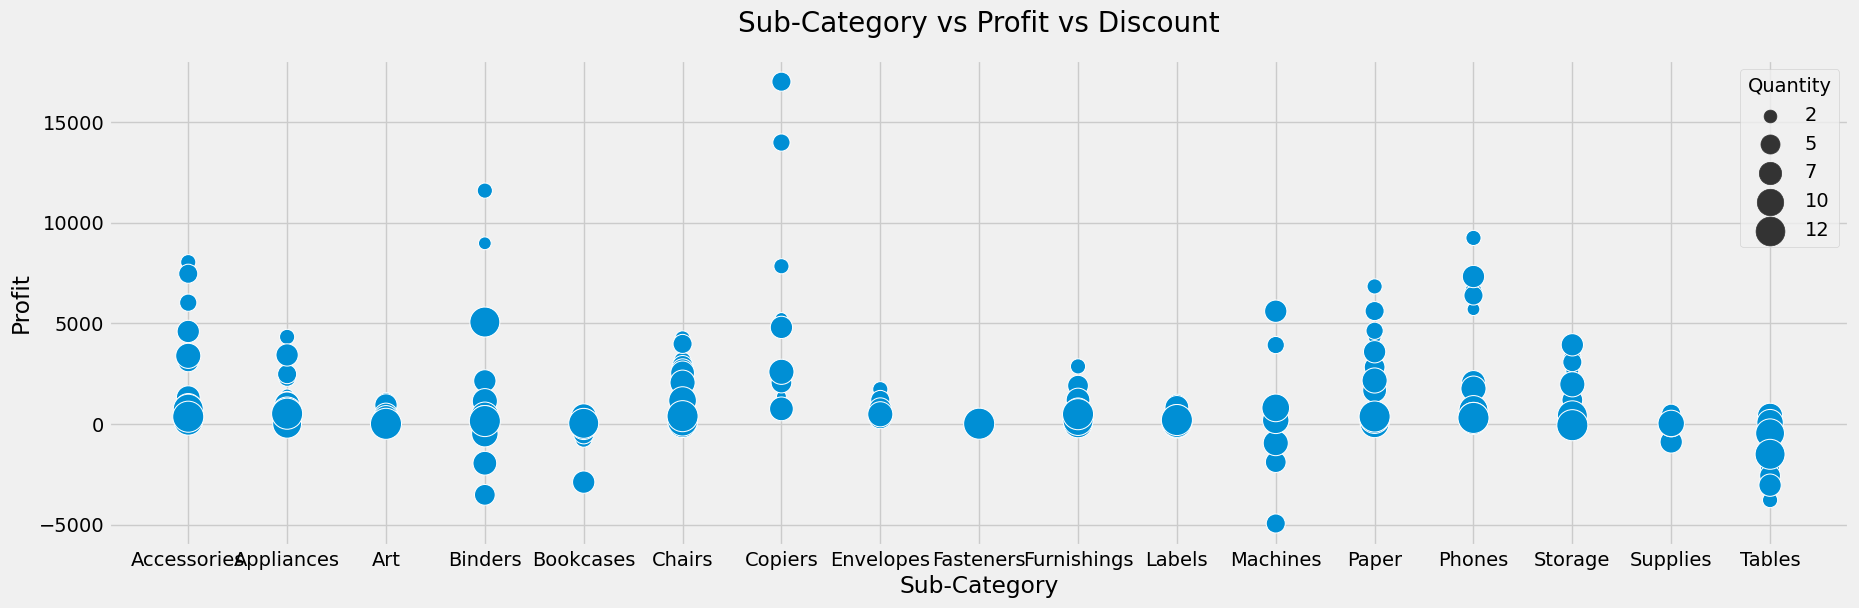

In [11]:
profit_rate_sub = data.groupby(['Sub-Category','Quantity'])['Profit'].sum().reset_index()

plt.figure(figsize=[20, 6])
sns.scatterplot(x=profit_rate_sub['Sub-Category'], y=profit_rate_sub['Profit'], size=profit_rate_sub["Quantity"], sizes=(50, 500))
plt.title("Sub-Category vs Profit vs Discount", size=20, pad=20)
plt.show()

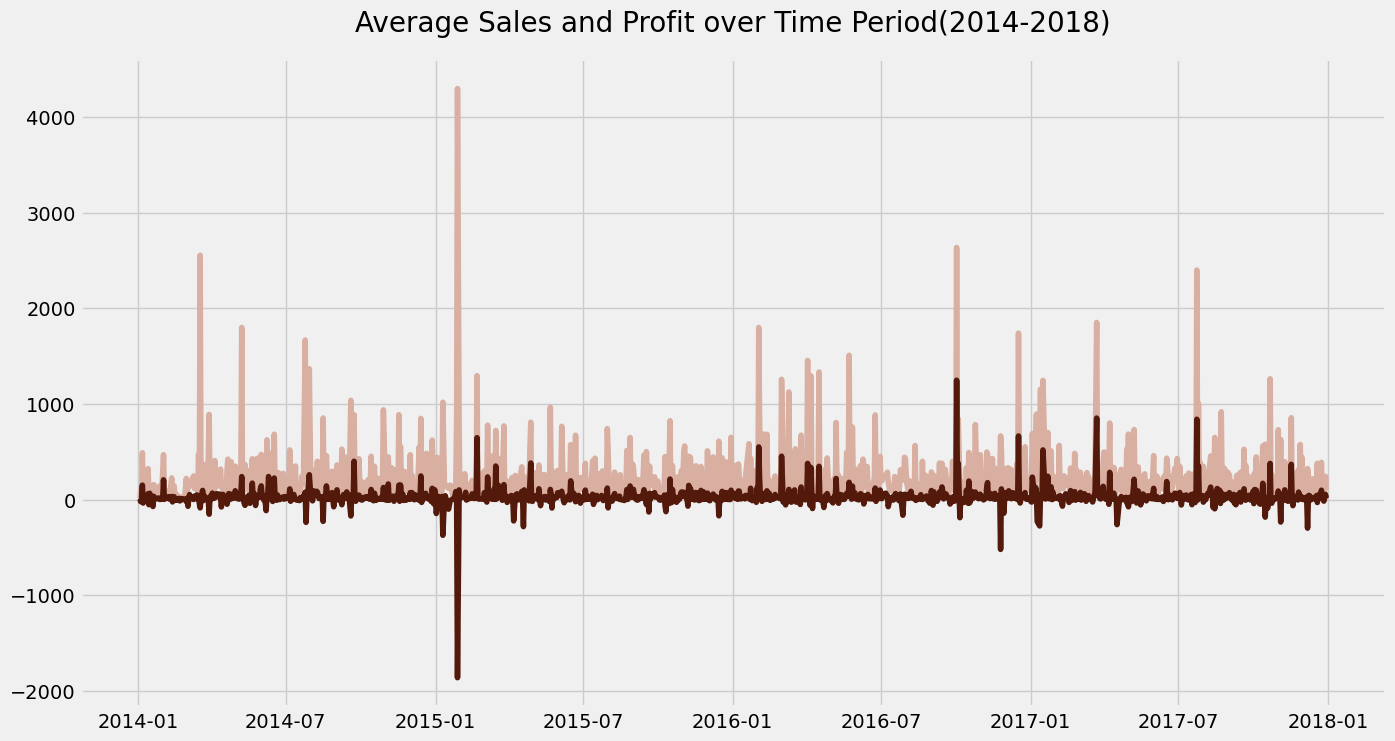

In [12]:
# First of all, we are going to take only the subset of data for our purpose. (To keep things simple)
df_line = data[['Order Date','Sales','Profit']].sort_values('Order Date') # Chronological Ordering
df_line['Order Date'] = pd.to_datetime(df_line['Order Date']) # Converting into DateTime
df_line = df_line.groupby('Order Date').mean() # Groupby to get the average Sales and Profit on each day

# Visualizing the Line Chart
plt.figure(figsize=[15,8])
plt.plot(df_line.index, 'Sales', data=df_line, color='#d9afa2') # Avg Sales over Time
plt.plot(df_line.index, 'Profit', data=df_line, color='#53190b') # Avg Profit over Time
plt.title("Average Sales and Profit over Time Period(2014-2018)", size=20, pad=20)

plt.show()